<a href="https://colab.research.google.com/github/guilhermelaviola/IMDbMovieListAnalysis/blob/main/IMDbWatchlistStudyFiltered.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import drive
sns.set(style = 'darkgrid')
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Setting the search parameters:
filename = 'imdb.xlsx'
search_path = '/content/drive/My Drive/Datasets/Movies'
# Search for the file
file = None
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file= os.path.join(root, filename)
        break
    df = pd.read_excel(file)

# **Basic information of the dataset**

In [4]:
# Importing the dataset and displying the last 10 rows:
imdb = pd.ExcelFile(file)
wl = pd.read_excel(imdb, 'Watchlist')
wl.tail()

,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status
489,2024-11-22,Conrack,Movie,7.3,106.0,1974,Drama,2331,1974-06-07 00:00:00,Martin Ritt,NaN
490,2024-12-04,Liebestraum,Movie,5.8,112.0,1991,"Mystery, Thriller",1707,1991-11-01 00:00:00,Mike Figgis,NaN
491,2024-12-10,No One Will Save You,Movie,6.3,93.0,2023,"Horror, Mystery, Sci-Fi, Thriller",71605,2023-09-22 00:00:00,Brian Duffield,NaN
492,2024-12-10,Heretic,Movie,7.1,111.0,2024,"Horror, Thriller",32271,2024-11-08 00:00:00,"Scott Beck, Bryan Woods",NaN
493,2024-12-12,Night of the Juggler,Movie,6.6,101.0,1980,"Action, Crime, Drama, Thriller",1153,1980-06-07 00:00:00,"Robert Butler, Sidney J. Furie",NaN


In [5]:
# Filtering the dataset by Status = 'To watch with mom':
to_watch_with_mom = wl[(wl['Status'] == 'To watch with mom')]

In [6]:
# Displaying the number of rows and columns in the filtered dataset:
to_watch_with_mom.shape

(204, 11)

In [7]:
# Displaying the datatypes of each column:
to_watch_with_mom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 487
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date added      204 non-null    datetime64[ns]
 1   Title           204 non-null    object        
 2   Title Type      204 non-null    object        
 3   IMDb Rating     202 non-null    float64       
 4   Runtime (mins)  203 non-null    float64       
 5   Year            204 non-null    int64         
 6   Genres          204 non-null    object        
 7   Num Votes       204 non-null    int64         
 8   Release Date    204 non-null    object        
 9   Directors       203 non-null    object        
 10  Status          204 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 19.1+ KB


In [8]:
# Displaying statistical data of the numerical data present in the filtered dataset:
to_watch_with_mom.describe()

,Date added,IMDb Rating,Runtime (mins),Year,Num Votes
count,204,202.000000,203.000000,204.000000,204.000000
mean,2022-12-12 07:31:45.882352896,6.882673,123.733990,1987.465686,67289.485294
min,2020-04-29 00:00:00,4.900000,71.000000,1940.000000,0.000000
25%,2022-02-24 18:00:00,6.400000,105.500000,1972.000000,5673.250000
50%,2022-10-18 12:00:00,6.900000,114.000000,1990.000000,19714.000000
75%,2023-11-18 06:00:00,7.300000,129.500000,2001.000000,62056.500000
max,2024-11-16 00:00:00,9.000000,317.000000,2024.000000,865430.000000
std,NaN,0.728624,32.966202,19.017073,130848.614881


# **Basic column data plotting**

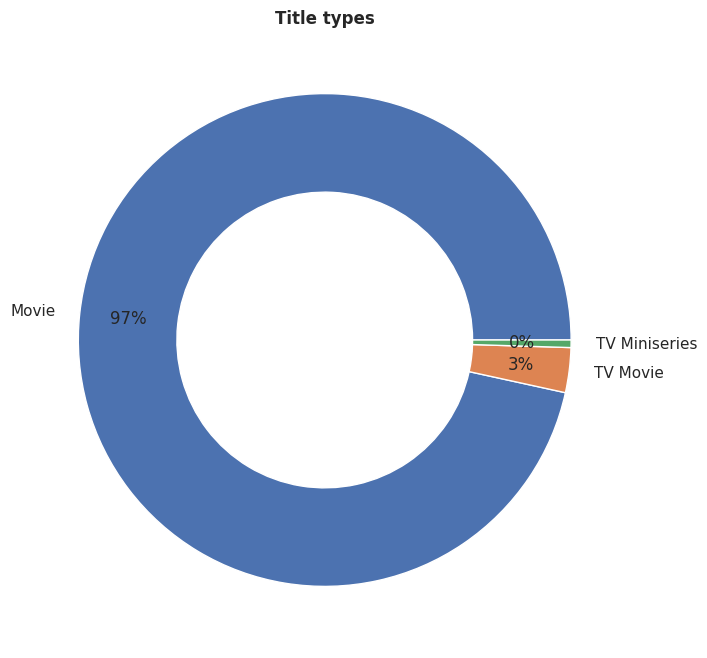

In [9]:
# Displaying the title types present in the filtered dataset:
to_watch_with_mom['Title Type'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Title types', fontweight = 'bold')
plt.show()

In [10]:
# Creating a datetime object based on the dates from the filtered dataset:
to_watch_with_mom['Date added'] = to_watch_with_mom['Date added'].map(pd.to_datetime)
to_watch_with_mom['Day Created'] = to_watch_with_mom['Date added'].apply(lambda x : x.day)
to_watch_with_mom['Month Created'] = to_watch_with_mom['Date added'].apply(lambda x : x.month)
to_watch_with_mom['Year Created'] = to_watch_with_mom['Date added'].apply(lambda x : x.year)
to_watch_with_mom['Weekday Created'] = to_watch_with_mom['Date added'].apply(lambda x : x.weekday())

# Displaying the datatypes of each column in the filtered dataset:
to_watch_with_mom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 487
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date added       204 non-null    datetime64[ns]
 1   Title            204 non-null    object        
 2   Title Type       204 non-null    object        
 3   IMDb Rating      202 non-null    float64       
 4   Runtime (mins)   203 non-null    float64       
 5   Year             204 non-null    int64         
 6   Genres           204 non-null    object        
 7   Num Votes        204 non-null    int64         
 8   Release Date     204 non-null    object        
 9   Directors        203 non-null    object        
 10  Status           204 non-null    object        
 11  Day Created      204 non-null    int64         
 12  Month Created    204 non-null    int64         
 13  Year Created     204 non-null    int64         
 14  Weekday Created  204 non-null    int64         

<ipython-input-10-7452e0626699>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Date added'] = to_watch_with_mom['Date added'].map(pd.to_datetime)
<ipython-input-10-7452e0626699>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Day Created'] = to_watch_with_mom['Date added'].apply(lambda x : x.day)
<ipython-input-10-7452e0626699>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

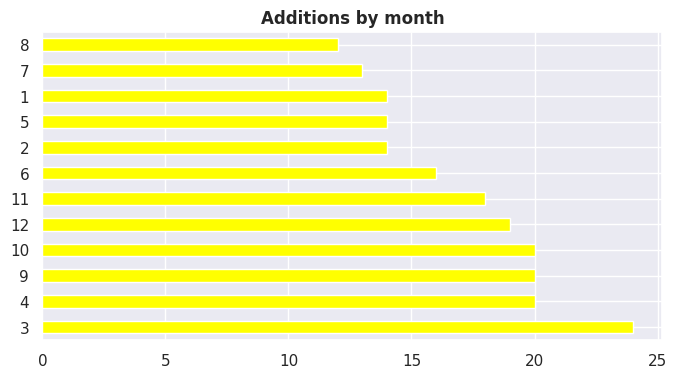

In [11]:
# Displaying the months with most and less additions:
to_watch_with_mom['Month Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Additions by month', fontweight = 'bold')
plt.show()

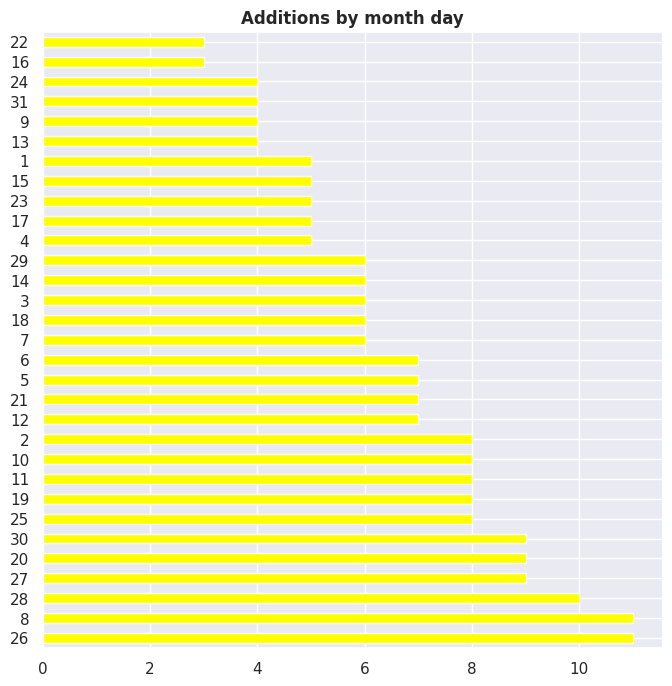

In [12]:
# Displaying the month days with most and less additions:
to_watch_with_mom['Day Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Additions by month day', fontweight = 'bold')
plt.show()

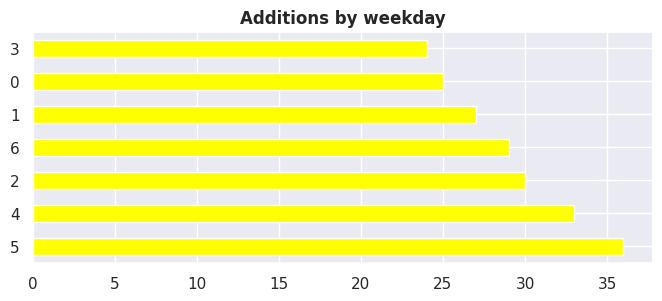

In [13]:
# Displaying the weekdays with most and less additions:
to_watch_with_mom['Weekday Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 3))
plt.ylabel(None)
plt.title('Additions by weekday', fontweight = 'bold')
plt.show()

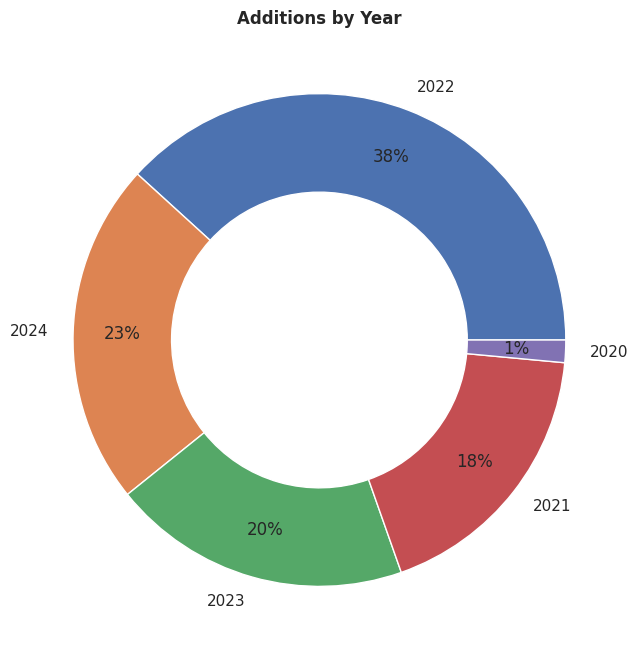

In [14]:
# Displaying the years with most and less additions:
to_watch_with_mom['Year Created'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Additions by Year', fontweight = 'bold')
plt.show()

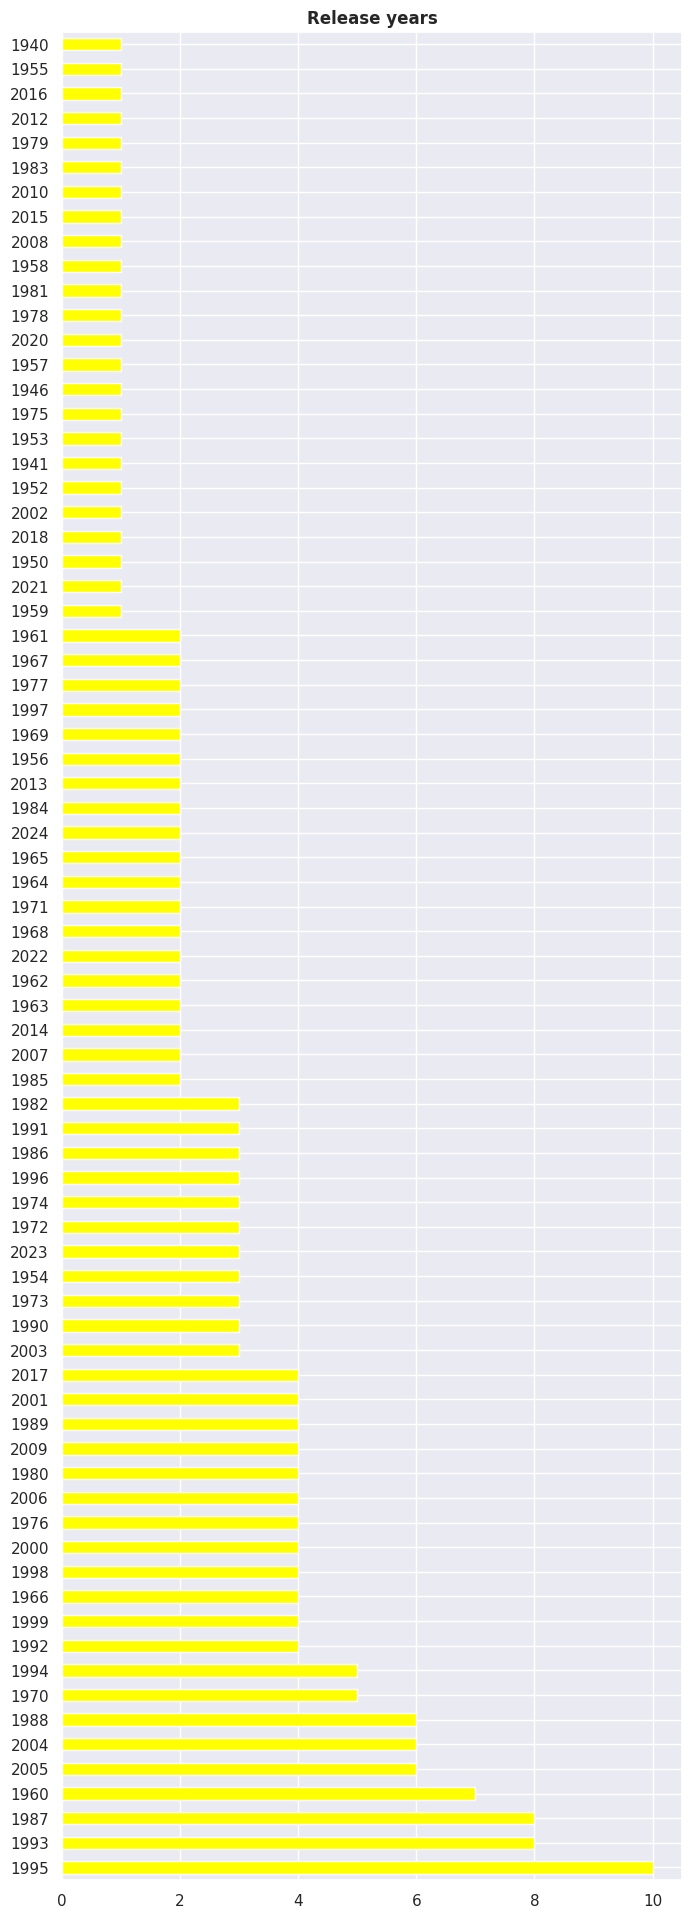

In [15]:
# Displaying distibution of release years in the dataset:
to_watch_with_mom['Year'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 24))
plt.ylabel(None)
plt.title('Release years', fontweight = 'bold')
plt.show()

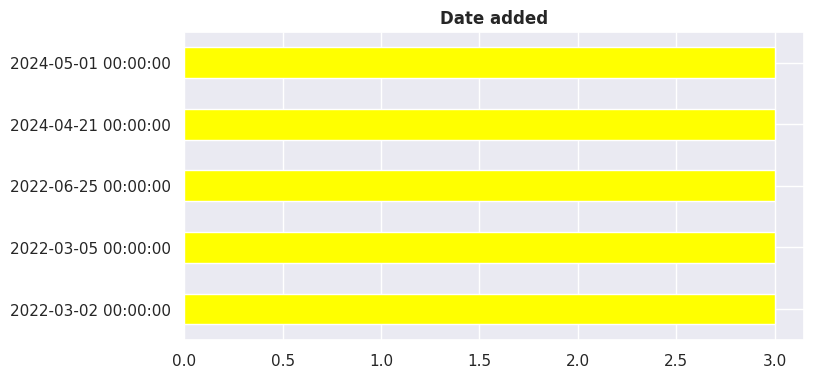

In [16]:
# Grouping by 'Date' and filtering groups with more than 2 entries only:
filtered_wl = to_watch_with_mom.groupby('Date added').filter(lambda x: len(x) > 2)

# Displaying dates with most additions:
filtered_wl['Date added'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Date added', fontweight = 'bold')
plt.show()

# **Applying functions to combine data from more than one column to generate new columns with analytics**

In [17]:
# Classifying the movies by decade they were release in:
def movies_by_decade(year):
  if year >= 1900 and year < 1910:
    result = '1900s'
  elif year >= 1910 and year < 1920:
    result = '1910s'
  elif year >= 1920 and year < 1930:
    result = '1920s'
  elif year >= 1930 and year < 1940:
    result = '1930s'
  elif year >= 1940 and year < 1950:
    result = '1940s'
  elif year >= 1950 and year < 1960:
    result = '1950s'
  elif year >= 1960 and year < 1970:
    result = '1960s'
  elif year >= 1970 and year < 1980:
    result = '1970s'
  elif year >= 1980 and year < 1990:
    result = '1980s'
  elif year >= 1990 and year < 2000:
    result = '1990s'
  elif year >= 2000 and year < 2010:
    result = '2000s'
  elif year >= 2010 and year < 2020:
    result = '2010s'
  elif year >= 2020 and year < 2030:
    result = '2020s'
  else:
    result = 'Unknown'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
to_watch_with_mom['Decade'] = to_watch_with_mom['Year'].apply(movies_by_decade)
to_watch_with_mom.head()

<ipython-input-17-33659bbd6e5a>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Decade'] = to_watch_with_mom['Year'].apply(movies_by_decade)


,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day Created,Month Created,Year Created,Weekday Created,Decade
0,2020-04-29,The Great Dictator,Movie,8.4,125.0,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,To watch with mom,29,4,2020,2,1940s
14,2020-11-20,12 Angry Men,Movie,9.0,96.0,1957,"Crime, Drama",865430,1957-04-10 00:00:00,Sidney Lumet,To watch with mom,20,11,2020,4,1950s
15,2020-11-26,Gettysburg,Movie,7.6,271.0,1993,"Drama, History, War",31310,1993-10-06 00:00:00,Ron Maxwell,To watch with mom,26,11,2020,3,1990s
22,2021-02-08,Hanky Panky,Movie,5.6,110.0,1982,"Action, Comedy, Crime, Mystery, Thriller",3109,1982-06-04 00:00:00,Sidney Poitier,To watch with mom,8,2,2021,0,1980s
23,2021-02-11,Bohemian Rhapsody,Movie,7.9,134.0,2018,"Biography, Drama, Music",593056,2018-10-23 00:00:00,Bryan Singer,To watch with mom,11,2,2021,3,2010s


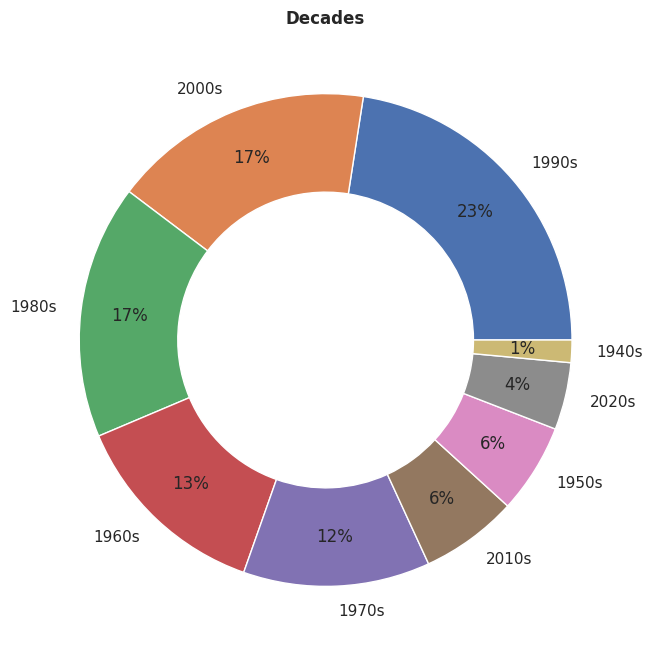

In [18]:
# Displaying the decades the movies are from:
to_watch_with_mom['Decade'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Decades', fontweight = 'bold')
plt.show()

In [19]:
# Classifying the movies by quality based on their rating:
def imdb_rating(rating):
  if rating >= 9:
    quality = 'Excellent'
  elif rating >= 8 and rating < 9:
    quality = 'Amazing'
  elif rating >= 7 and rating < 8:
    quality = 'Good'
  elif rating >= 6 and rating < 7:
    quality = 'Okay'
  elif rating >= 5 and rating < 6:
    quality = 'Regular'
  elif rating >= 4 and rating < 5:
    quality = 'Bad'
  else:
    quality = 'It sucks!'
  return quality

# Applying the function above on a column of the dataset and generating a new column as result:
to_watch_with_mom['Quality'] = to_watch_with_mom['IMDb Rating'].apply(imdb_rating)
to_watch_with_mom.head()

<ipython-input-19-c0a382964691>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Quality'] = to_watch_with_mom['IMDb Rating'].apply(imdb_rating)


,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality
0,2020-04-29,The Great Dictator,Movie,8.4,125.0,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,To watch with mom,29,4,2020,2,1940s,Amazing
14,2020-11-20,12 Angry Men,Movie,9.0,96.0,1957,"Crime, Drama",865430,1957-04-10 00:00:00,Sidney Lumet,To watch with mom,20,11,2020,4,1950s,Excellent
15,2020-11-26,Gettysburg,Movie,7.6,271.0,1993,"Drama, History, War",31310,1993-10-06 00:00:00,Ron Maxwell,To watch with mom,26,11,2020,3,1990s,Good
22,2021-02-08,Hanky Panky,Movie,5.6,110.0,1982,"Action, Comedy, Crime, Mystery, Thriller",3109,1982-06-04 00:00:00,Sidney Poitier,To watch with mom,8,2,2021,0,1980s,Regular
23,2021-02-11,Bohemian Rhapsody,Movie,7.9,134.0,2018,"Biography, Drama, Music",593056,2018-10-23 00:00:00,Bryan Singer,To watch with mom,11,2,2021,3,2010s,Good


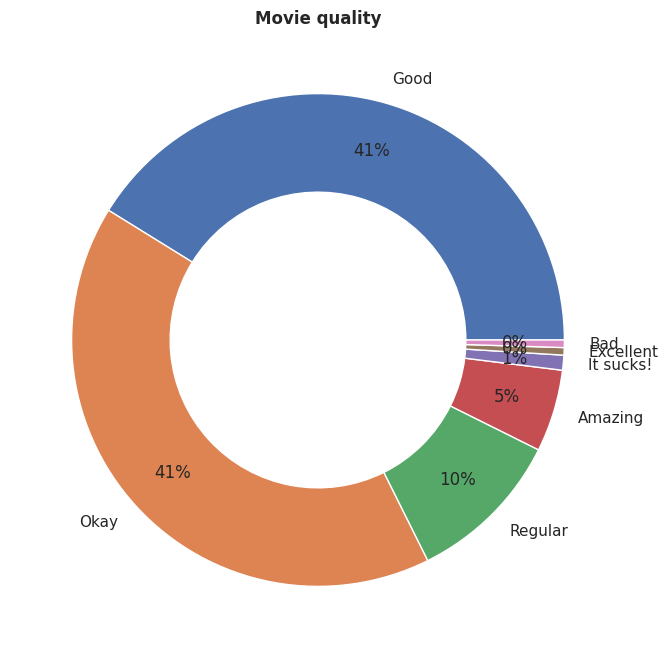

In [20]:
# Displaying the movie rating classification based on the algorithm above:
to_watch_with_mom['Quality'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie quality', fontweight = 'bold')
plt.show()

In [21]:
# Classifying the movies by popularity based on how many people rated them:
def movie_popularity(num_votes):
  if num_votes > 2000000:
    popularity = 'Over 2M votes'
  elif num_votes > 1000000 and num_votes <= 2000000:
    popularity = 'Over 1M votes'
  elif num_votes > 500000 and num_votes <= 1000000:
    popularity = 'Over 500k votes'
  elif num_votes > 250000 and num_votes <= 500000:
    popularity = 'Over 250k votes'
  else:
    popularity = 'Less than 250k votes'
  return popularity

# Applying the function above on a column of the dataset and generating a new column as result:
to_watch_with_mom['Movie popularity'] = to_watch_with_mom['Num Votes'].apply(movie_popularity)
to_watch_with_mom.head()

<ipython-input-21-cebfd6ec921e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Movie popularity'] = to_watch_with_mom['Num Votes'].apply(movie_popularity)


,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity
0,2020-04-29,The Great Dictator,Movie,8.4,125.0,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,To watch with mom,29,4,2020,2,1940s,Amazing,Less than 250k votes
14,2020-11-20,12 Angry Men,Movie,9.0,96.0,1957,"Crime, Drama",865430,1957-04-10 00:00:00,Sidney Lumet,To watch with mom,20,11,2020,4,1950s,Excellent,Over 500k votes
15,2020-11-26,Gettysburg,Movie,7.6,271.0,1993,"Drama, History, War",31310,1993-10-06 00:00:00,Ron Maxwell,To watch with mom,26,11,2020,3,1990s,Good,Less than 250k votes
22,2021-02-08,Hanky Panky,Movie,5.6,110.0,1982,"Action, Comedy, Crime, Mystery, Thriller",3109,1982-06-04 00:00:00,Sidney Poitier,To watch with mom,8,2,2021,0,1980s,Regular,Less than 250k votes
23,2021-02-11,Bohemian Rhapsody,Movie,7.9,134.0,2018,"Biography, Drama, Music",593056,2018-10-23 00:00:00,Bryan Singer,To watch with mom,11,2,2021,3,2010s,Good,Over 500k votes


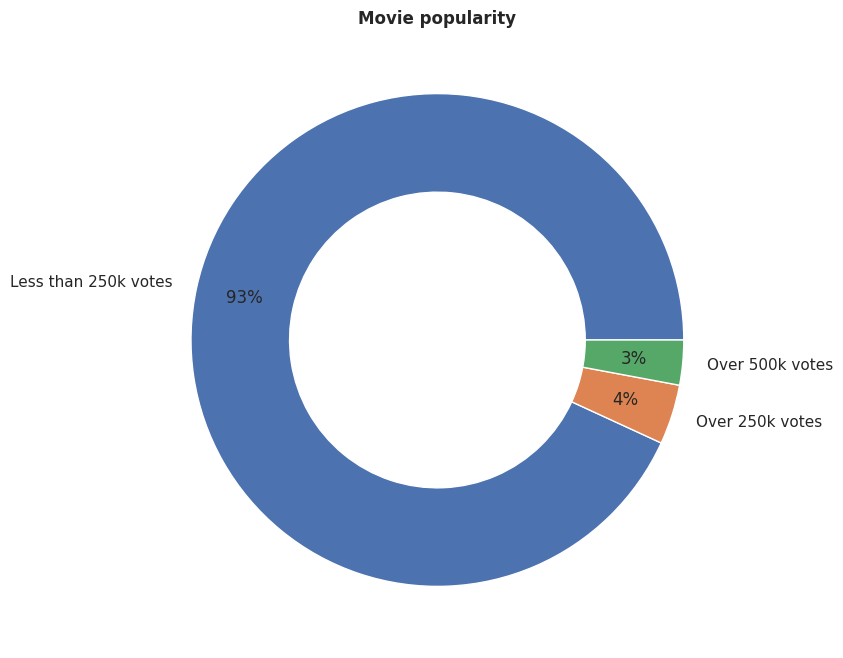

In [22]:
# Displaying the movie popularity based on the algorithm above:
to_watch_with_mom['Movie popularity'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie popularity', fontweight = 'bold')
plt.show()

In [23]:
# Classifying the movies by duration based on their runtime:
def movie_duration(runtime):
  if runtime >= 180:
    duration = 'Over 3h'
  elif runtime >= 150 and runtime < 180:
    duration = 'Between 2h30 and 2h59'
  elif runtime >= 120 and runtime < 150:
    duration = 'Between 2h and 2h29'
  elif runtime >= 100 and runtime < 120:
    duration = 'Between 1h40 and 1h59'
  elif runtime >= 90 and runtime < 100:
    duration = 'Between 1h30 and 1h39'
  elif runtime >= 70 and runtime < 90:
    duration = 'Between 1h10 and 1h29'
  else:
    duration = 'Shorter than 70 minutes'
  return duration

# Applying the function above on a column of the dataset and generating a new column as result:
to_watch_with_mom['Movie duration'] = to_watch_with_mom['Runtime (mins)'].apply(movie_duration)
to_watch_with_mom.head()

<ipython-input-23-5c4972d8f521>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Movie duration'] = to_watch_with_mom['Runtime (mins)'].apply(movie_duration)


,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration
0,2020-04-29,The Great Dictator,Movie,8.4,125.0,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,To watch with mom,29,4,2020,2,1940s,Amazing,Less than 250k votes,Between 2h and 2h29
14,2020-11-20,12 Angry Men,Movie,9.0,96.0,1957,"Crime, Drama",865430,1957-04-10 00:00:00,Sidney Lumet,To watch with mom,20,11,2020,4,1950s,Excellent,Over 500k votes,Between 1h30 and 1h39
15,2020-11-26,Gettysburg,Movie,7.6,271.0,1993,"Drama, History, War",31310,1993-10-06 00:00:00,Ron Maxwell,To watch with mom,26,11,2020,3,1990s,Good,Less than 250k votes,Over 3h
22,2021-02-08,Hanky Panky,Movie,5.6,110.0,1982,"Action, Comedy, Crime, Mystery, Thriller",3109,1982-06-04 00:00:00,Sidney Poitier,To watch with mom,8,2,2021,0,1980s,Regular,Less than 250k votes,Between 1h40 and 1h59
23,2021-02-11,Bohemian Rhapsody,Movie,7.9,134.0,2018,"Biography, Drama, Music",593056,2018-10-23 00:00:00,Bryan Singer,To watch with mom,11,2,2021,3,2010s,Good,Over 500k votes,Between 2h and 2h29


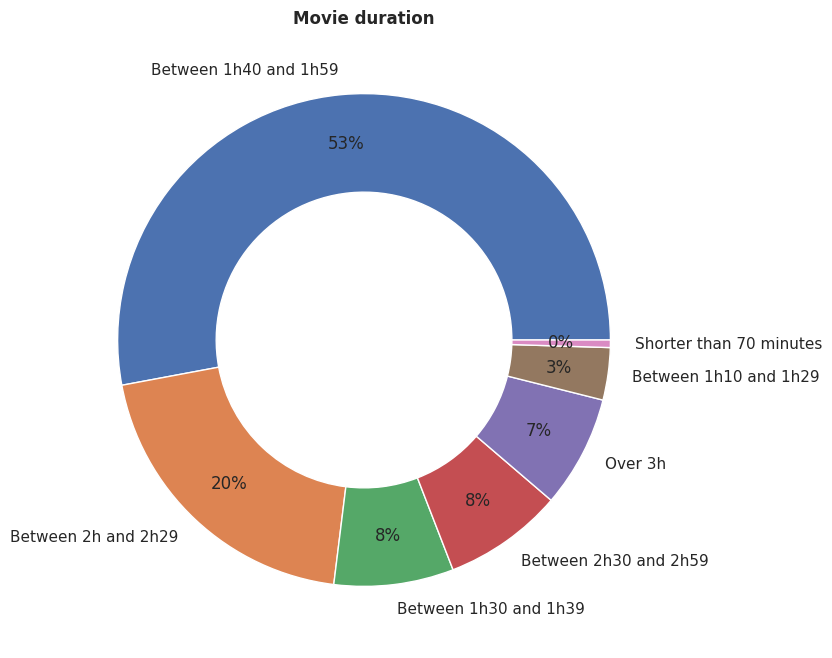

In [24]:
# Displaying the movie duration based on the algorithm above:
to_watch_with_mom['Movie duration'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie duration', fontweight = 'bold')
plt.show()

In [25]:
# Classifying the movies by year quartile added based on the month they were added to the dataset:
def year_quartile(month):
  if month >= 1 and month <= 3:
    quartile = 'First'
  elif month >= 4 and month <= 6:
    quartile = 'Second'
  elif month >= 7 and month <= 9:
    quartile = 'Third'
  else:
    quartile = 'Fourth'
  return quartile

# Applying the function above on a column of the dataset and generating a new column as result:
to_watch_with_mom['Quartile Added'] = to_watch_with_mom['Month Created'].apply(year_quartile)
to_watch_with_mom.head()

<ipython-input-25-a88387f4e083>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Quartile Added'] = to_watch_with_mom['Month Created'].apply(year_quartile)


,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Status,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration,Quartile Added
0,2020-04-29,The Great Dictator,Movie,8.4,125.0,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,To watch with mom,29,4,2020,2,1940s,Amazing,Less than 250k votes,Between 2h and 2h29,Second
14,2020-11-20,12 Angry Men,Movie,9.0,96.0,1957,"Crime, Drama",865430,1957-04-10 00:00:00,Sidney Lumet,To watch with mom,20,11,2020,4,1950s,Excellent,Over 500k votes,Between 1h30 and 1h39,Fourth
15,2020-11-26,Gettysburg,Movie,7.6,271.0,1993,"Drama, History, War",31310,1993-10-06 00:00:00,Ron Maxwell,To watch with mom,26,11,2020,3,1990s,Good,Less than 250k votes,Over 3h,Fourth
22,2021-02-08,Hanky Panky,Movie,5.6,110.0,1982,"Action, Comedy, Crime, Mystery, Thriller",3109,1982-06-04 00:00:00,Sidney Poitier,To watch with mom,8,2,2021,0,1980s,Regular,Less than 250k votes,Between 1h40 and 1h59,First
23,2021-02-11,Bohemian Rhapsody,Movie,7.9,134.0,2018,"Biography, Drama, Music",593056,2018-10-23 00:00:00,Bryan Singer,To watch with mom,11,2,2021,3,2010s,Good,Over 500k votes,Between 2h and 2h29,First


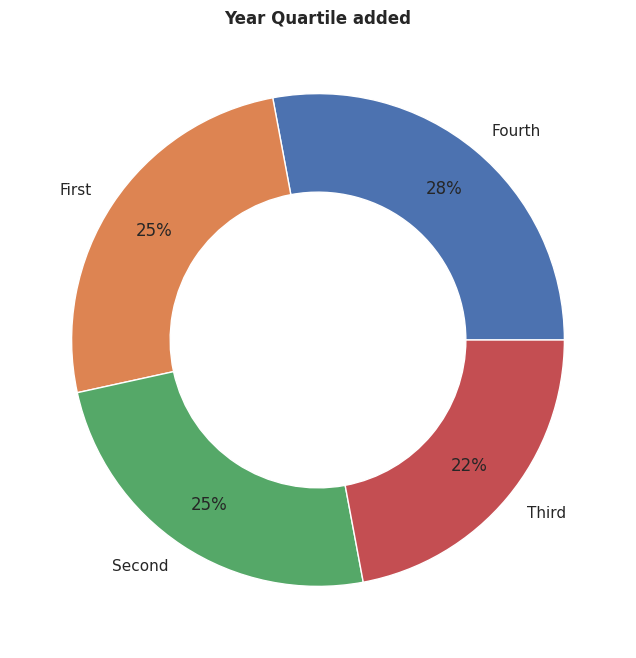

In [26]:
# Displaying the quartile the movie was added based on the algorithm above:
to_watch_with_mom['Quartile Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Year Quartile added', fontweight = 'bold')
plt.show()

In [27]:
# Classifying the movies by the month half added based on the day they were added to the dataset:
def month_half(day):
  if day >= 1 and day <= 15:
    half = 'First'
  else:
    half = 'Second'
  return half

# Applying the function above on a column of the dataset and generating a new column as result:
to_watch_with_mom['Month Half Added'] = to_watch_with_mom['Day Created'].apply(month_half)
to_watch_with_mom.head()

<ipython-input-27-a7e4e0574ba8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Month Half Added'] = to_watch_with_mom['Day Created'].apply(month_half)


,Date added,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,...,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration,Quartile Added,Month Half Added
0,2020-04-29,The Great Dictator,Movie,8.4,125.0,1940,"Comedy, Drama, War",237408,1940-10-15 00:00:00,Charles Chaplin,...,29,4,2020,2,1940s,Amazing,Less than 250k votes,Between 2h and 2h29,Second,Second
14,2020-11-20,12 Angry Men,Movie,9.0,96.0,1957,"Crime, Drama",865430,1957-04-10 00:00:00,Sidney Lumet,...,20,11,2020,4,1950s,Excellent,Over 500k votes,Between 1h30 and 1h39,Fourth,Second
15,2020-11-26,Gettysburg,Movie,7.6,271.0,1993,"Drama, History, War",31310,1993-10-06 00:00:00,Ron Maxwell,...,26,11,2020,3,1990s,Good,Less than 250k votes,Over 3h,Fourth,Second
22,2021-02-08,Hanky Panky,Movie,5.6,110.0,1982,"Action, Comedy, Crime, Mystery, Thriller",3109,1982-06-04 00:00:00,Sidney Poitier,...,8,2,2021,0,1980s,Regular,Less than 250k votes,Between 1h40 and 1h59,First,First
23,2021-02-11,Bohemian Rhapsody,Movie,7.9,134.0,2018,"Biography, Drama, Music",593056,2018-10-23 00:00:00,Bryan Singer,...,11,2,2021,3,2010s,Good,Over 500k votes,Between 2h and 2h29,First,First


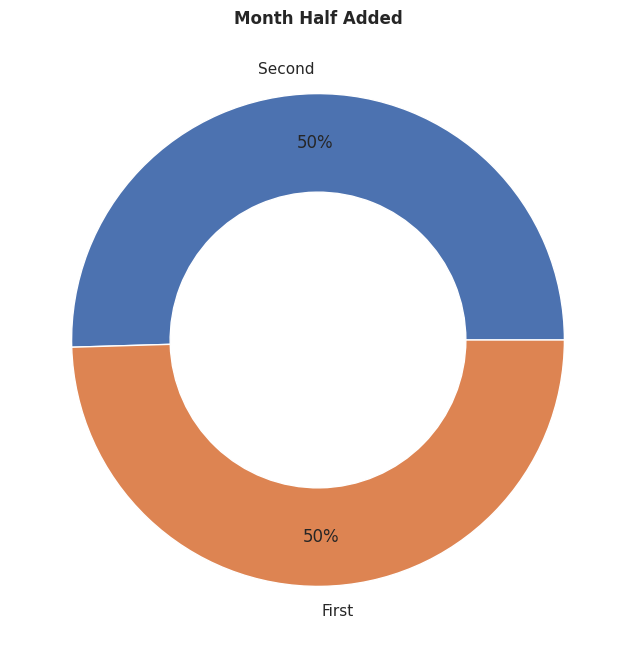

In [ ]:
# Displaying the month half the movie was added based on the algorithm above:
to_watch_with_mom['Month Half Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Month Half Added', fontweight = 'bold')
plt.show()

# **The algorithm below was a bit more complicated to be implemented, as the movie genres are listed in the column separated by comma, so they had to be splitted and counted, and then their proportions were counted and plotted.**

In [28]:
# Creating a list of genres:
genre_list = pd.DataFrame({'Genres' : [
              'Action','Animation', 'Biography',
              'Comedy', 'Crime', 'Drama',
              'Documentary', 'Family', 'Fantasy',
              'Film-Noir', 'History', 'Horror',
              'Mystery', 'Music', 'Musical',
              'Romance', 'Sci-Fi', 'Sport',
              'Thriller', 'War', 'Western']})

# Splitting the genres by comma and removing leading spaces:
to_watch_with_mom['Genres'] = to_watch_with_mom['Genres'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
to_watch_with_mom = to_watch_with_mom.explode('Genres')

# Counting Matrix using crosstab method:
genre_counts = pd.crosstab(index = to_watch_with_mom.index, columns = to_watch_with_mom['Genres'], margins = False).to_dict('index')
genre_counts = pd.DataFrame(genre_counts)

# Counting the number of 0s and 1s in each row:
counts = (genre_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

<ipython-input-28-7f07c1d7911d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Genres'] = to_watch_with_mom['Genres'].str.split(',').apply(lambda x : [i.strip() for i in x])


In [29]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
counts = pd.DataFrame(counts.tolist(), index = counts.index, columns = ['False', 'True'])
print(counts)

             False  True
Action         170    34
Adventure      166    38
Animation      203     1
Biography      173    31
Comedy         162    42
Crime          165    39
Documentary    203     1
Drama           27   177
Family         184    20
Fantasy        194    10
Film-Noir      201     3
History        181    23
Horror         201     3
Music          195     9
Mystery        195     9
Romance        160    44
Sci-Fi         192    12
Sport          186    18
Thriller       170    34
War            171    33
Western        190    14


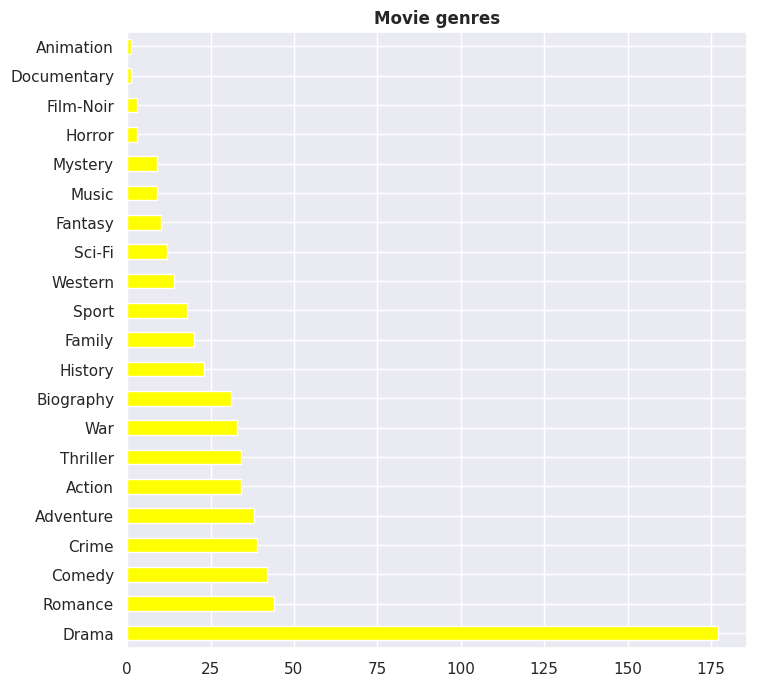

In [30]:
# Displaying the proportions of the movie genres present in the dataset:
counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Movie genres', fontweight = 'bold')
plt.show()

In [31]:
to_watch_with_mom = to_watch_with_mom[to_watch_with_mom['Directors'].apply(lambda x: isinstance(x, str))]

# Splitting the directors by comma and removing leading spaces:
to_watch_with_mom['Directors'] = to_watch_with_mom['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
to_watch_with_mom = to_watch_with_mom.explode('Directors')

# Counting Matrix using crosstab method:
directors_counts = pd.crosstab(index = to_watch_with_mom.index, columns = to_watch_with_mom['Directors'], margins = False).to_dict('index')
directors_counts = pd.DataFrame(directors_counts)

# Counting the number of 0s and 1s in each row:
final_directors_counts = (directors_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

<ipython-input-31-08fa5ebcc414>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_watch_with_mom['Directors'] = to_watch_with_mom['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])


In [32]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
final_directors_counts = pd.DataFrame(final_directors_counts.tolist(), index = final_directors_counts.index, columns = ['False', 'True'])
print(final_directors_counts)

                         False  True
Alex Segal                 202     0
Alfonso Arau               202     0
Alfred Hitchcock           202     0
Andrew Erwin               202     0
Andrew Marton              202     0
...                        ...   ...
Wes Craven                 201     0
William Cameron Menzies    202     0
William Dear               202     0
William Wyler              202     0
Wolfgang Petersen          202     0

[188 rows x 2 columns]


In [33]:
# Grouping by 'Date' and filtering groups with more than 2 entries only:
# Displaying dates with most additions:
dir = final_directors_counts[final_directors_counts['True'] > 1] # Filtering DataFrame based on values in 'True' column

# Check if 'dir' DataFrame is empty before plotting
if not dir.empty:
  dir['True'].sort_values(ascending=False).plot(kind='barh', color='yellow', figsize=(8, 4))
  plt.ylabel(None)
  plt.title('Movie directors', fontweight='bold')
  plt.show()
else:
  print("No directors found with more than 1 movies in the watchlist.")

No directors found with more than 1 movies in the watchlist.
